# Tech Interview - PT. Jasamedika Saranatama
## Forecasting Drug Stocks
### by Anggara Sutisna

## 1. Import Library

In [1]:
#main
import pandas as pd
import numpy as np

#visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

## 2. Load Dataset

In [88]:
data = pd.read_csv('forecasting_dataset.csv')

In [89]:
data.head(5)

,nama_unit,nama_obat,tgl_cek,kode_supplier,id_trans,stok
0,Poliklinik A,Actemra,1/9/2022 0:00,4,8,85
1,Poliklinik B,Acetylcysteine,1/10/2022 0:00,2,9,25
2,Poliklinik C,Cimetidine,1/11/2022 0:00,3,10,30
3,Apotek A,Aclidinium,1/12/2022 0:00,3,11,21
4,Apotek C,Acetylcysteine,1/13/2022 0:00,2,12,5


## 3. Preprocessing

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nama_unit      22 non-null     object
 1   nama_obat      22 non-null     object
 2   tgl_cek        22 non-null     object
 3   kode_supplier  22 non-null     int64 
 4   id_trans       22 non-null     int64 
 5   stok           22 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ KB


#### Dari insight diatas, kita mendapati bahwa tanggal cek memiliki data tipe object, sedangkan dalam proses pemodelan forecasting yang merupakan time-series kita memerlukan data bertipe date. Maka akan dilakukan perubahan tipe data pada `tgl_cek`

In [91]:
data['tgl_cek'] = pd.to_datetime(data['tgl_cek']) 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nama_unit      22 non-null     object        
 1   nama_obat      22 non-null     object        
 2   tgl_cek        22 non-null     datetime64[ns]
 3   kode_supplier  22 non-null     int64         
 4   id_trans       22 non-null     int64         
 5   stok           22 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.2+ KB


In [93]:
data.describe()

,kode_supplier,id_trans,stok
count,22.000000,22.000000,22.000000
mean,4.954545,25.636364,29.681818
std,1.463111,10.440514,27.245596
min,2.000000,8.000000,0.000000
25%,4.000000,15.500000,10.000000
50%,6.000000,28.500000,23.000000
75%,6.000000,33.750000,35.250000
max,6.000000,39.000000,95.000000


In [94]:
# grouping data berdasarkan Poliklinik/Apotek
unitCount = data.groupby(['nama_unit']).count()['id_trans'].sort_values(ascending=False)
unitCount

nama_unit
Apotek A        13
Apotek B         2
Poliklinik A     2
Poliklinik B     2
Poliklinik C     2
Apotek C         1
Name: id_trans, dtype: int64

<Axes: xlabel='nama_unit', ylabel='count'>

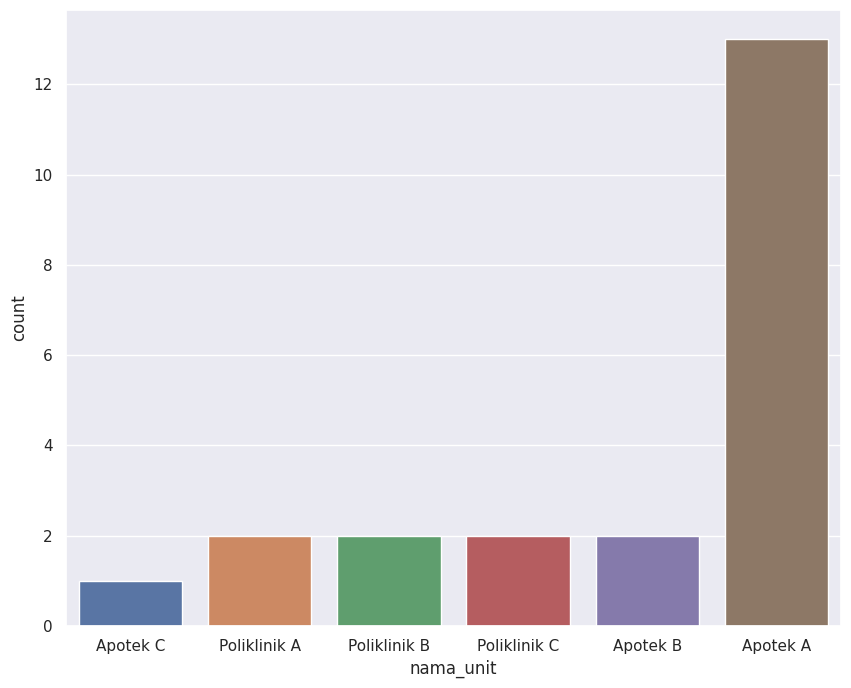

In [95]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.countplot(x='nama_unit',data=data, order=data['nama_unit'].value_counts(ascending=True).index)

### Insight yang didapat dari data diatas adalah Apotek A memiliki jumlah transaksi terbanyak sejumlah 13

In [96]:
# grouping data berdasarkan obat paling banyak stok
obatCount = data.groupby(['nama_obat']).sum()['stok'].sort_values(ascending=False)
obatCount

nama_obat
Biotin                     372
Actemra                    180
Acetylcysteine              30
Cimetidine                  30
Aclidinium                  21
Acetazolamide               15
Ciprofibrate                 5
Acetylcysteine Inhalasi      0
Name: stok, dtype: int64

<Axes: xlabel='nama_obat', ylabel='count'>

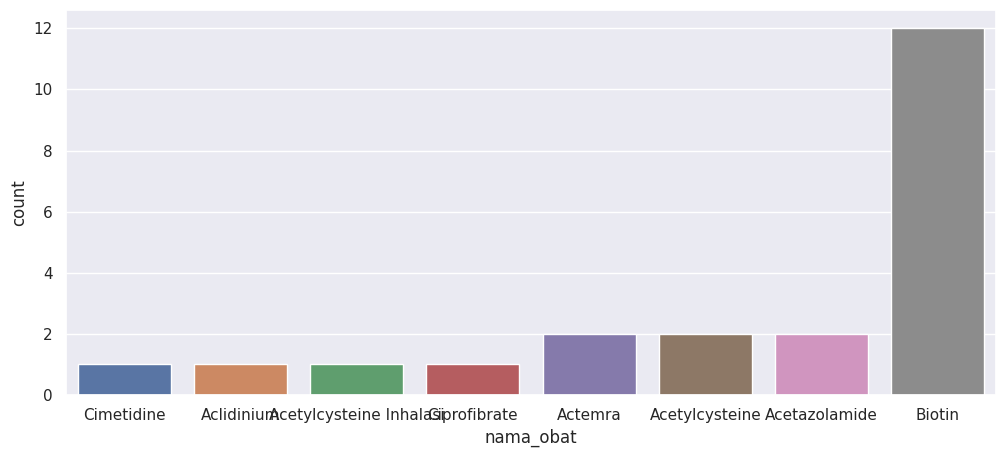

In [97]:
plt.figure(figsize=(12,5))
sns.countplot(x='nama_obat',data=data,order=data['nama_obat'].value_counts(ascending=True).index)

### Insight yang didapat dari data diatas adalah nama obat Biotin memiliki jumlah stok akumulasi terbanyak yaitu 372

In [98]:
data = data[(data['nama_unit'] == "Apotek A")]

<Axes: xlabel='nama_obat', ylabel='count'>

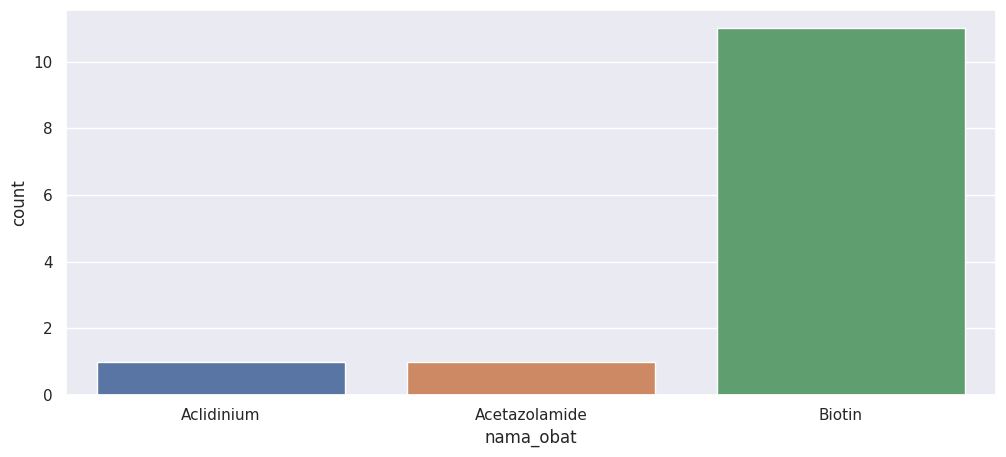

In [99]:
plt.figure(figsize=(12,5))
sns.countplot(x='nama_obat',data=data,order=data['nama_obat'].value_counts(ascending=True).index)

### Maka akan dipilih Apotek A dengan jenis obat Biotin yang akan kita analisis lebih lanjut

In [83]:
data = data[(data['nama_unit'] == "Apotek A") & (data['nama_obat'] == "Biotin")]

In [84]:
data.head()

,nama_unit,nama_obat,tgl_cek,stok
11,Apotek A,Biotin,2022-02-18,2
12,Apotek A,Biotin,2022-02-19,50
13,Apotek A,Biotin,2022-02-20,30
14,Apotek A,Biotin,2022-02-21,25
15,Apotek A,Biotin,2022-02-22,10


- Selanjutnya kita bisa menghapus fitur yang tidak akan digunakan seperti kode_supplier, id_trans

In [85]:
data = data[["nama_unit", "nama_obat", "tgl_cek", "stok"]]

In [86]:
data.head()

,nama_unit,nama_obat,tgl_cek,stok
11,Apotek A,Biotin,2022-02-18,2
12,Apotek A,Biotin,2022-02-19,50
13,Apotek A,Biotin,2022-02-20,30
14,Apotek A,Biotin,2022-02-21,25
15,Apotek A,Biotin,2022-02-22,10


### Visualization - Apotek A

<Axes: xlabel='tgl_cek', ylabel='stok'>

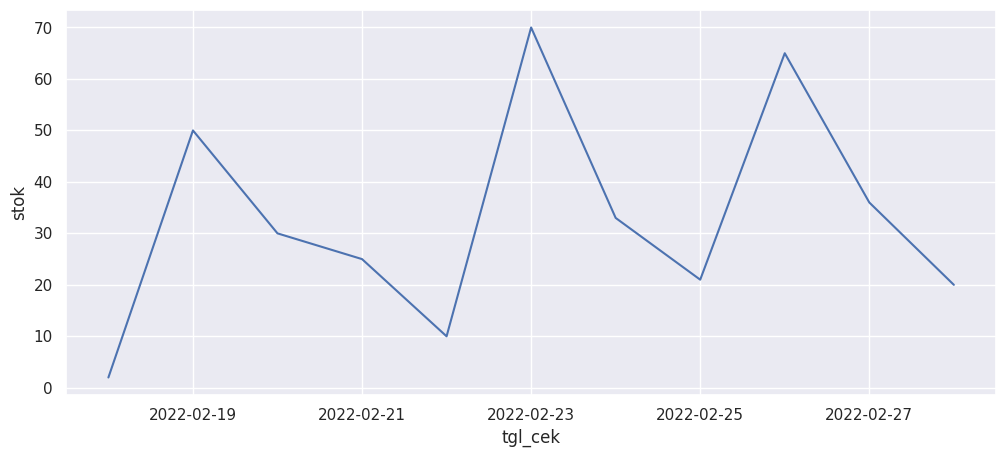

In [87]:
plt.figure(figsize=(12,5))
sns.lineplot(x="tgl_cek", y='stok', data=data)